<a href="https://colab.research.google.com/github/Shatha-1/IT326-Project/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uploading the dataset:

In [19]:
# Step 0: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
print("Step 1: Importing the dataset...")
dataset_path = "Depression Student Dataset.csv"

def load_dataset():
    try:
        data = pd.read_csv(dataset_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print(f"Could not find the dataset at: {dataset_path}. Please check the file name and path.")
        return None
df = load_dataset()

Step 1: Importing the dataset...
Dataset loaded successfully.


## 🟩 Understanding the Dataset:

In [20]:
if df is not None:
    # Step 2: Dataset Overview
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Column names:", df.columns.tolist())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values Before Handling:")
    print(df.isnull().sum())

Rows: 502, Columns: 11
Column names: ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Data Types:
Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

Missing Values Before Handling:
Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisf

The dataset contains 502 rows and 11 columns, representing information about students and various factors related to depression.
All columns have no missing values, which means the dataset is clean and ready for analysis.
The attributes include both demographic and behavioral information such as:

Gender, Age, and Sleep Duration (personal attributes)

Academic Pressure, Study Satisfaction, and Study Hours (academic-related factors)

Financial Stress and Family History of Mental Illness (environmental and familial factors)

Depression (target label indicating whether a student is depressed or not)

## 🟩 Numeric Analysis – Five-Number Summary Results:

In [21]:
# Step 3: Numeric Analysis (Five-number summary, Boxplots, Outliers)

# Identify numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric features detected:", numeric_features)

# Five-number summary
print("\nFive-number summary for each numeric feature:")
five_num_summary = df[numeric_features].describe(percentiles=[0.25, 0.5, 0.75])
five_num_summary = five_num_summary.loc[['min','25%','50%','75%','max']]
print(five_num_summary)


Numeric features detected: ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

Five-number summary for each numeric feature:
      Age  Academic Pressure  Study Satisfaction  Study Hours  \
min  18.0                1.0                 1.0          0.0   
25%  22.0                2.0                 2.0          3.0   
50%  26.5                3.0                 3.0          7.0   
75%  30.0                4.0                 4.0         10.0   
max  34.0                5.0                 5.0         12.0   

     Financial Stress  
min               1.0  
25%               2.0  
50%               3.0  
75%               4.0  
max               5.0  


In this step, a statistical summary was generated for the truly numeric attributes in the dataset.
Although the code detected all columns as numeric because they are stored as numbers, only two columns are genuinely numerical:
Age and Study Hours.

Other features such as Academic Pressure, Study Satisfaction, and Financial Stress use numeric scales (1–5) to represent levels or categories — these are ordinal categorical variables, not continuous numeric data.

The five-number summary (minimum, first quartile (25%), median (50%), third quartile (75%), and maximum) was used to describe the range and distribution of the numeric columns.
For instance:

Age values range from 18 to 34, representing the actual numeric variation among students.

Study Hours range from 0 to 12, showing differences in daily study duration.

In conclusion, while many columns appear numeric, only Age and Study Hours are considered true numeric features suitable for numerical statistical analysis.

In [22]:
# Automatically detect numeric features while excluding binary/categorical ones
numeric_features = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() > 5  # ignore columns that have few unique values (categorical)
]

print("Numeric features detected:", numeric_features)

# ---- Five-number summary ----
print("\nFive-number summary for each numeric feature:")
five_num_summary = df[numeric_features].describe(percentiles=[0.25, 0.5, 0.75]).T[['min', '25%', '50%', '75%', 'max']]
print(five_num_summary)


Numeric features detected: ['Age', 'Study Hours']

Five-number summary for each numeric feature:
              min   25%   50%   75%   max
Age          18.0  22.0  26.5  30.0  34.0
Study Hours   0.0   3.0   7.0  10.0  12.0


Note:
An additional code block was added to automatically detect and display only the truly numeric attributes.
This helps exclude categorical or ordinal columns that are encoded as numbers, ensuring that only continuous numeric features (such as Age and Study Hours) are included in the statistical summary.

## 🟩 Box plots:

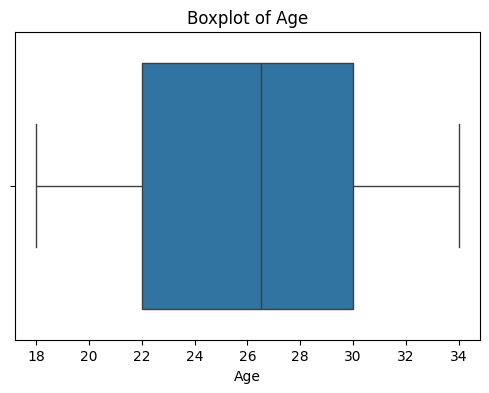

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

The boxplot shows that the Age values are fairly balanced, with most data points clustered around the median.
This indicates that the participants are generally close in age, with no extreme variations observed.

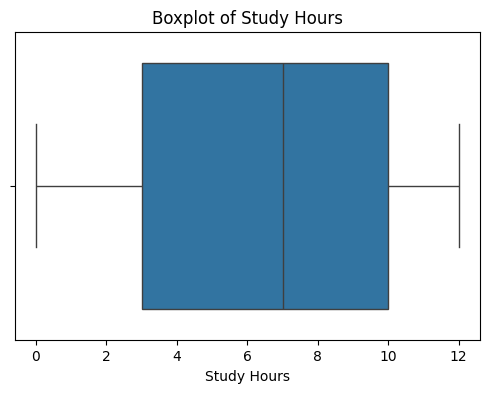

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Study Hours'])
plt.title('Boxplot of Study Hours')
plt.show()


The boxplot for Study Hours demonstrates a relatively even distribution, suggesting that most students study a similar number of hours.
There are no significant differences or extreme study durations among participants.

## 🟩 Outlier Detection Analysis

In [25]:
# ---- Outlier detection using IQR ----
outliers = {}
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers[col] = outlier_values
    print(f"\nColumn: {col}")
    if outlier_values.empty:
        print("  No outliers detected.")
    else:
        print(f"  Number of outliers: {len(outlier_values)}")
        print("  Example values:", outlier_values.head().tolist())


Column: Age
  No outliers detected.

Column: Study Hours
  No outliers detected.


No outliers were detected for either Age or Study Hours, indicating that all data points fall within a reasonable and consistent range.

## 📊 Visualization — Numeric Attributes

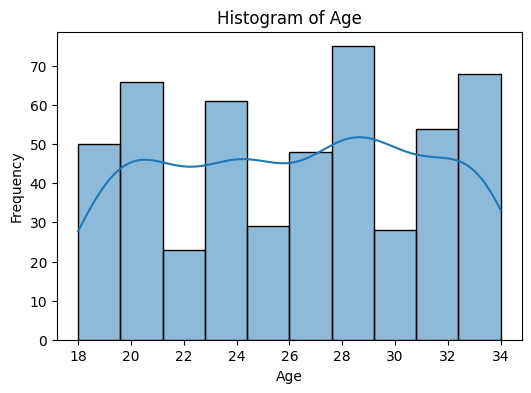

In [26]:
# Histogram for Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


 Analysis (Age):  
The students are distributed between ages 18 and 34, with peaks around 20–21, 28–29, and 32–33.  
The data shows a relatively balanced spread but with some noticeable clusters at specific ages.  
This indicates that the dataset mainly represents young adults and does not require major cleaning for the Age attribute.


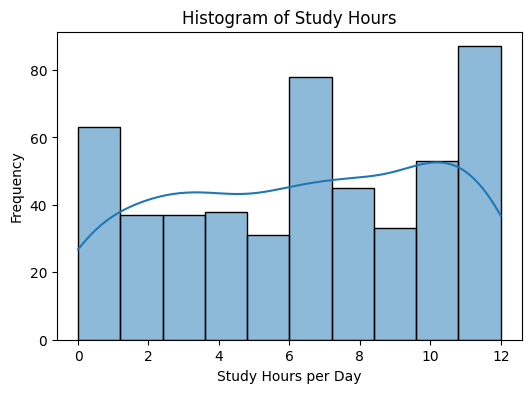

In [27]:
# Histogram for Study Hours
plt.figure(figsize=(6,4))
sns.histplot(df['Study Hours'], bins=10, kde=True)
plt.title('Histogram of Study Hours')
plt.xlabel('Study Hours per Day')
plt.ylabel('Frequency')
plt.show()


 Analysis (Study Hours):  
Most students study between 0 and 12 hours daily.  
There are clear peaks at 0 hours (students not studying) and at 10–12 hours (students studying excessively).  
This suggests the presence of potential outliers or unusual data points at the extremes.


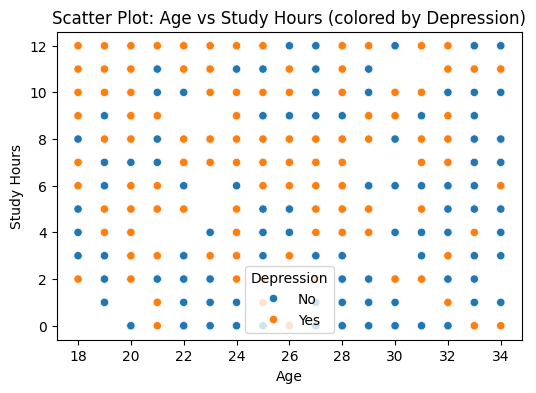

In [28]:
# Scatter plot: Age vs Study Hours
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Study Hours', hue='Depression', data=df)
plt.title('Scatter Plot: Age vs Study Hours (colored by Depression)')
plt.xlabel('Age')
plt.ylabel('Study Hours')
plt.show()


 Analysis (Scatter Plot):  
The scatter plot shows no strong linear relationship between age and study hours.  
Students with "Depression = Yes" and "Depression = No" appear across almost all ages and study levels.  
This suggests that other factors (e.g., Academic Pressure or Sleep Duration) may play a more significant role in predicting depression.


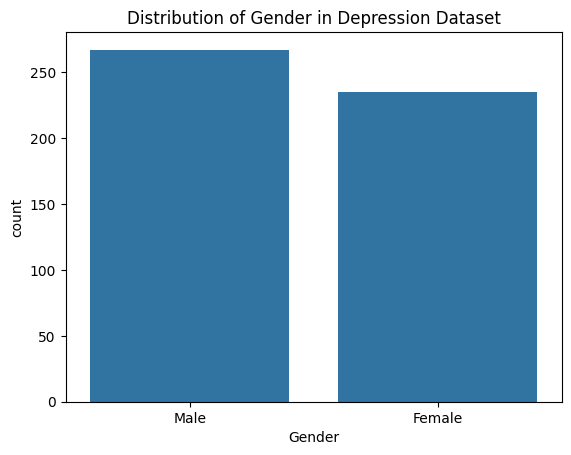

In [29]:
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender in Depression Dataset')
plt.show()

Bar Plot – Gender
The gender distribution shows 267 male students and 235 female students. The dataset is relatively balanced in terms of gender, which is beneficial for analysis.

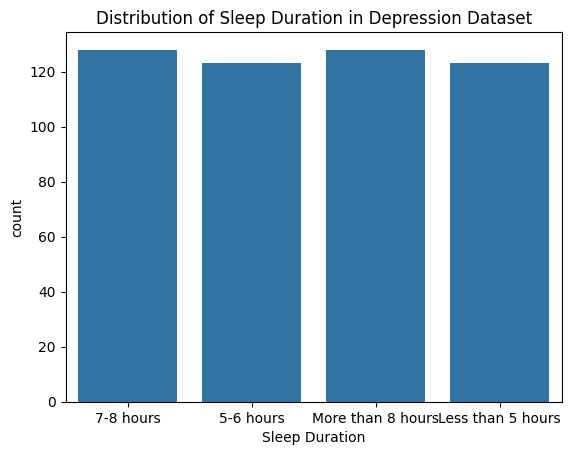

In [30]:
sns.countplot(x='Sleep Duration', data=df)
plt.title('Distribution of Sleep Duration in Depression Dataset')
plt.show()

Bar Plot – Sleep Duration
The distribution of sleep duration is fairly balanced across the four categories: less than 5 hours (123), 5–6 hours (123), 7–8 hours (128), and more than 8 hours (128). This balanced distribution helps in ensuring fair comparison between categories.

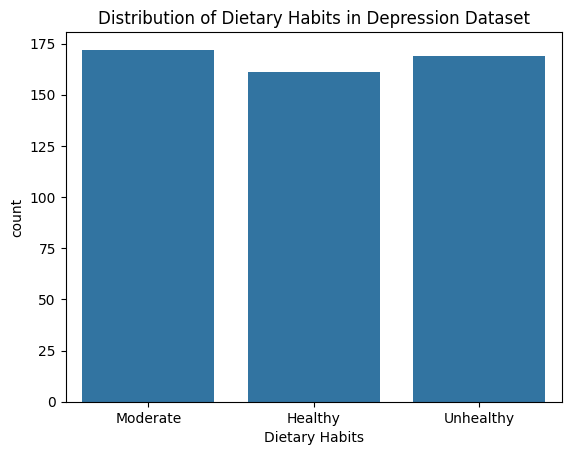

In [31]:
sns.countplot(x='Dietary Habits', data=df)
plt.title('Distribution of Dietary Habits in Depression Dataset')

plt.show()

Bar Plot – Dietary Habits
The dietary habits of students are distributed among three categories: Moderate (172), Unhealthy (169), and Healthy (161). The near balance among categories indicates diverse eating habits in the dataset.

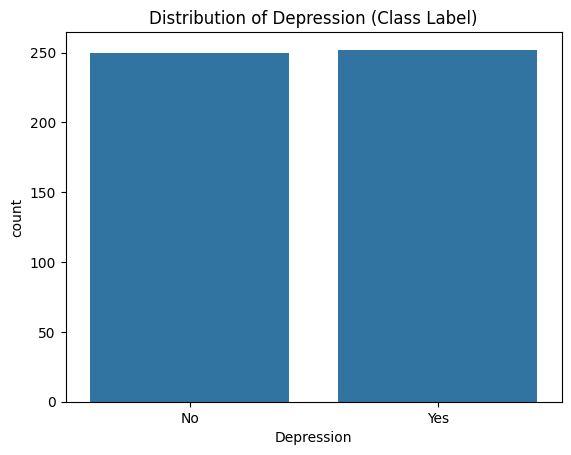

In [32]:
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (Class Label)')
plt.show()

Bar Plot – Depression (Class Label)
The class label distribution is almost perfectly balanced, with 252 students labeled “Yes” for depression and 250 labeled “No.” This balance reduces the risk of bias during classification tasks.

# **Data before preprocessing**

These boxplots show how the numerical values look before preprocessing.
They help visualize how the data is spread and make it easy to spot outliers — values that are unusually high or low compared to the rest.
By looking at these plots, we can understand which features might need cleaning or normalization later to make the dataset more accurate and balanced.

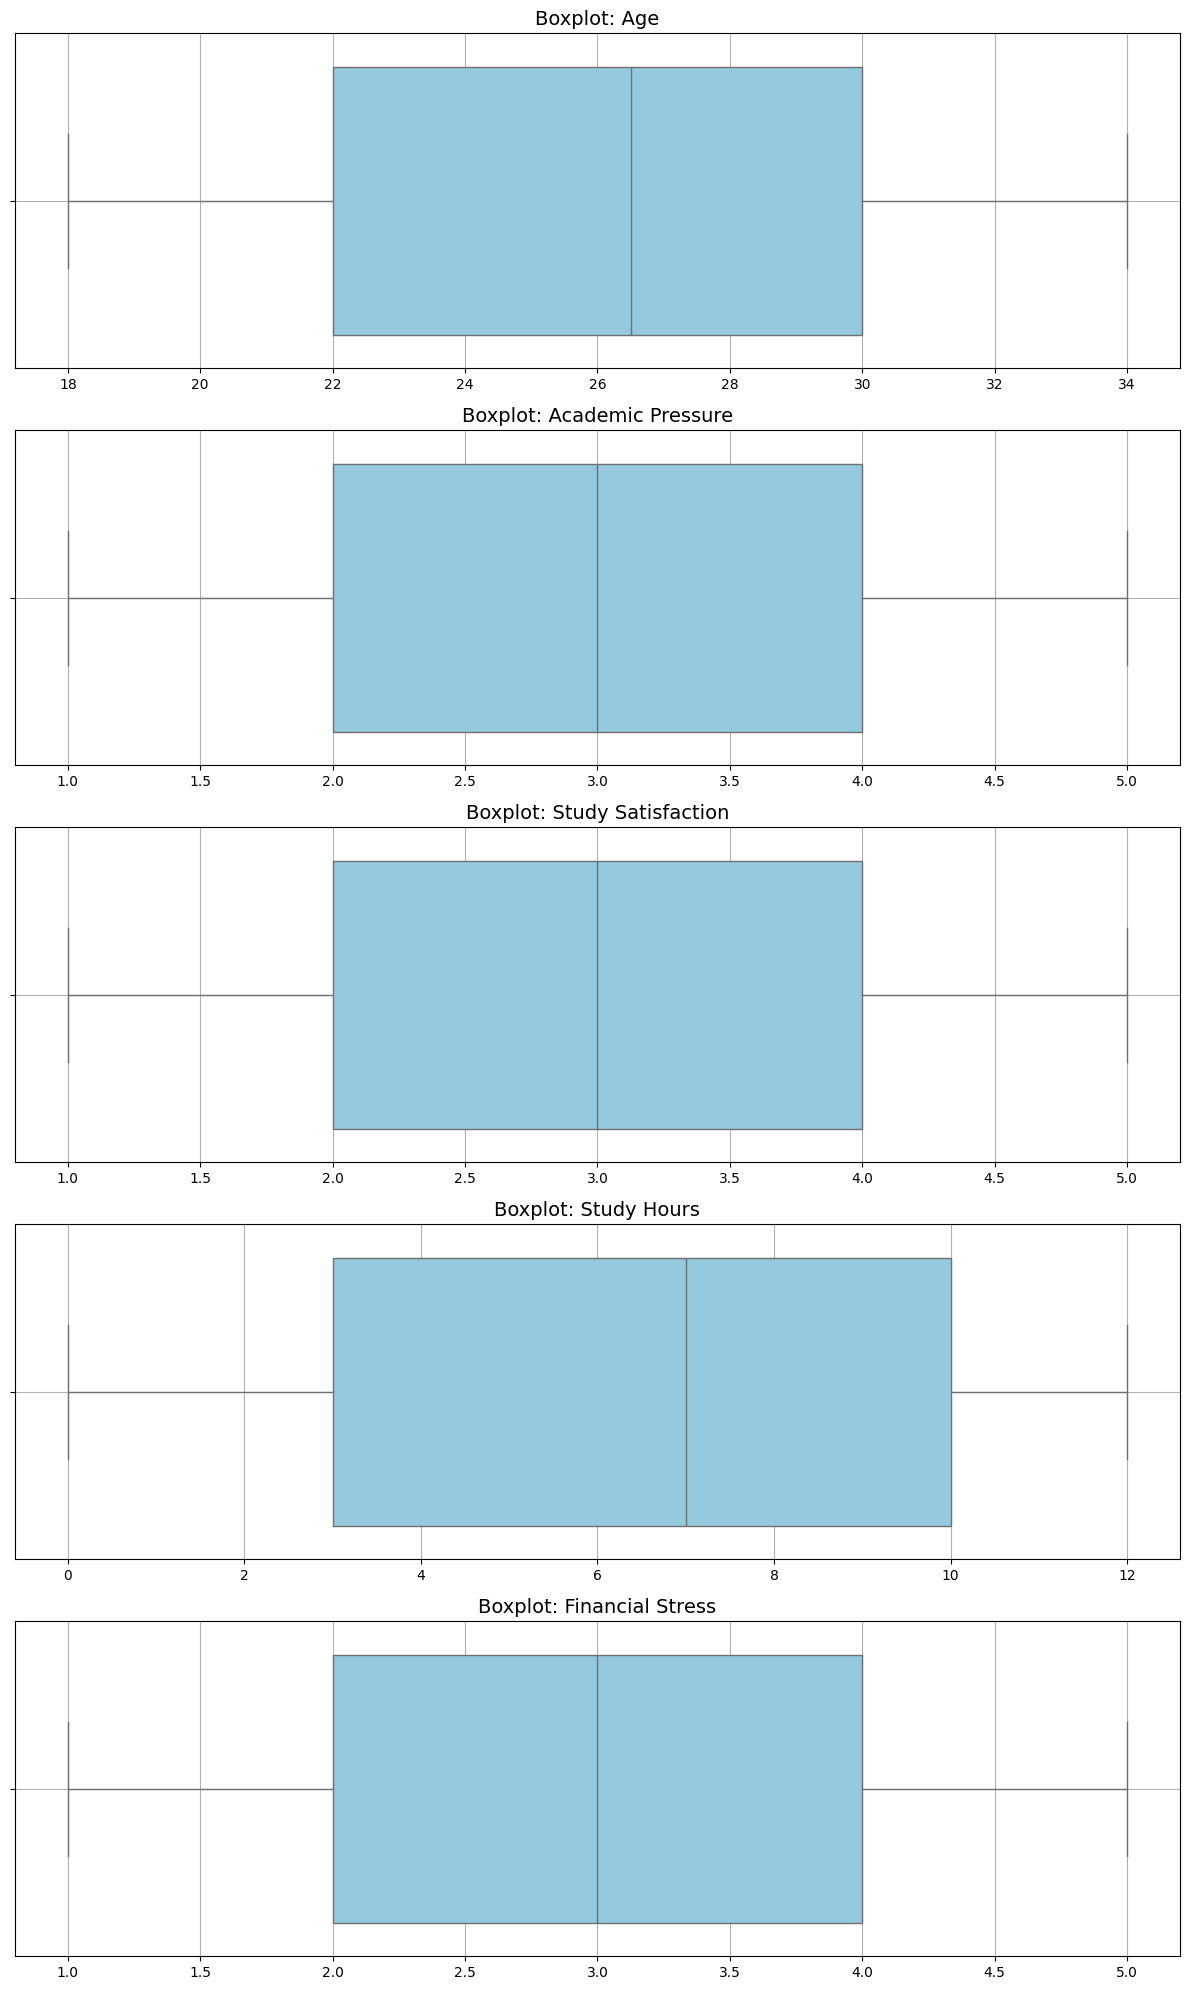

In [33]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# **Detecting Noise**

These boxplots display the numerical features before removing noise.
They help identify the presence of outliers, which appear as points lying far away from the main box area.
By analyzing these plots, we can determine which attributes contain extreme values that may negatively affect the accuracy of the analysis or model if left untreated.

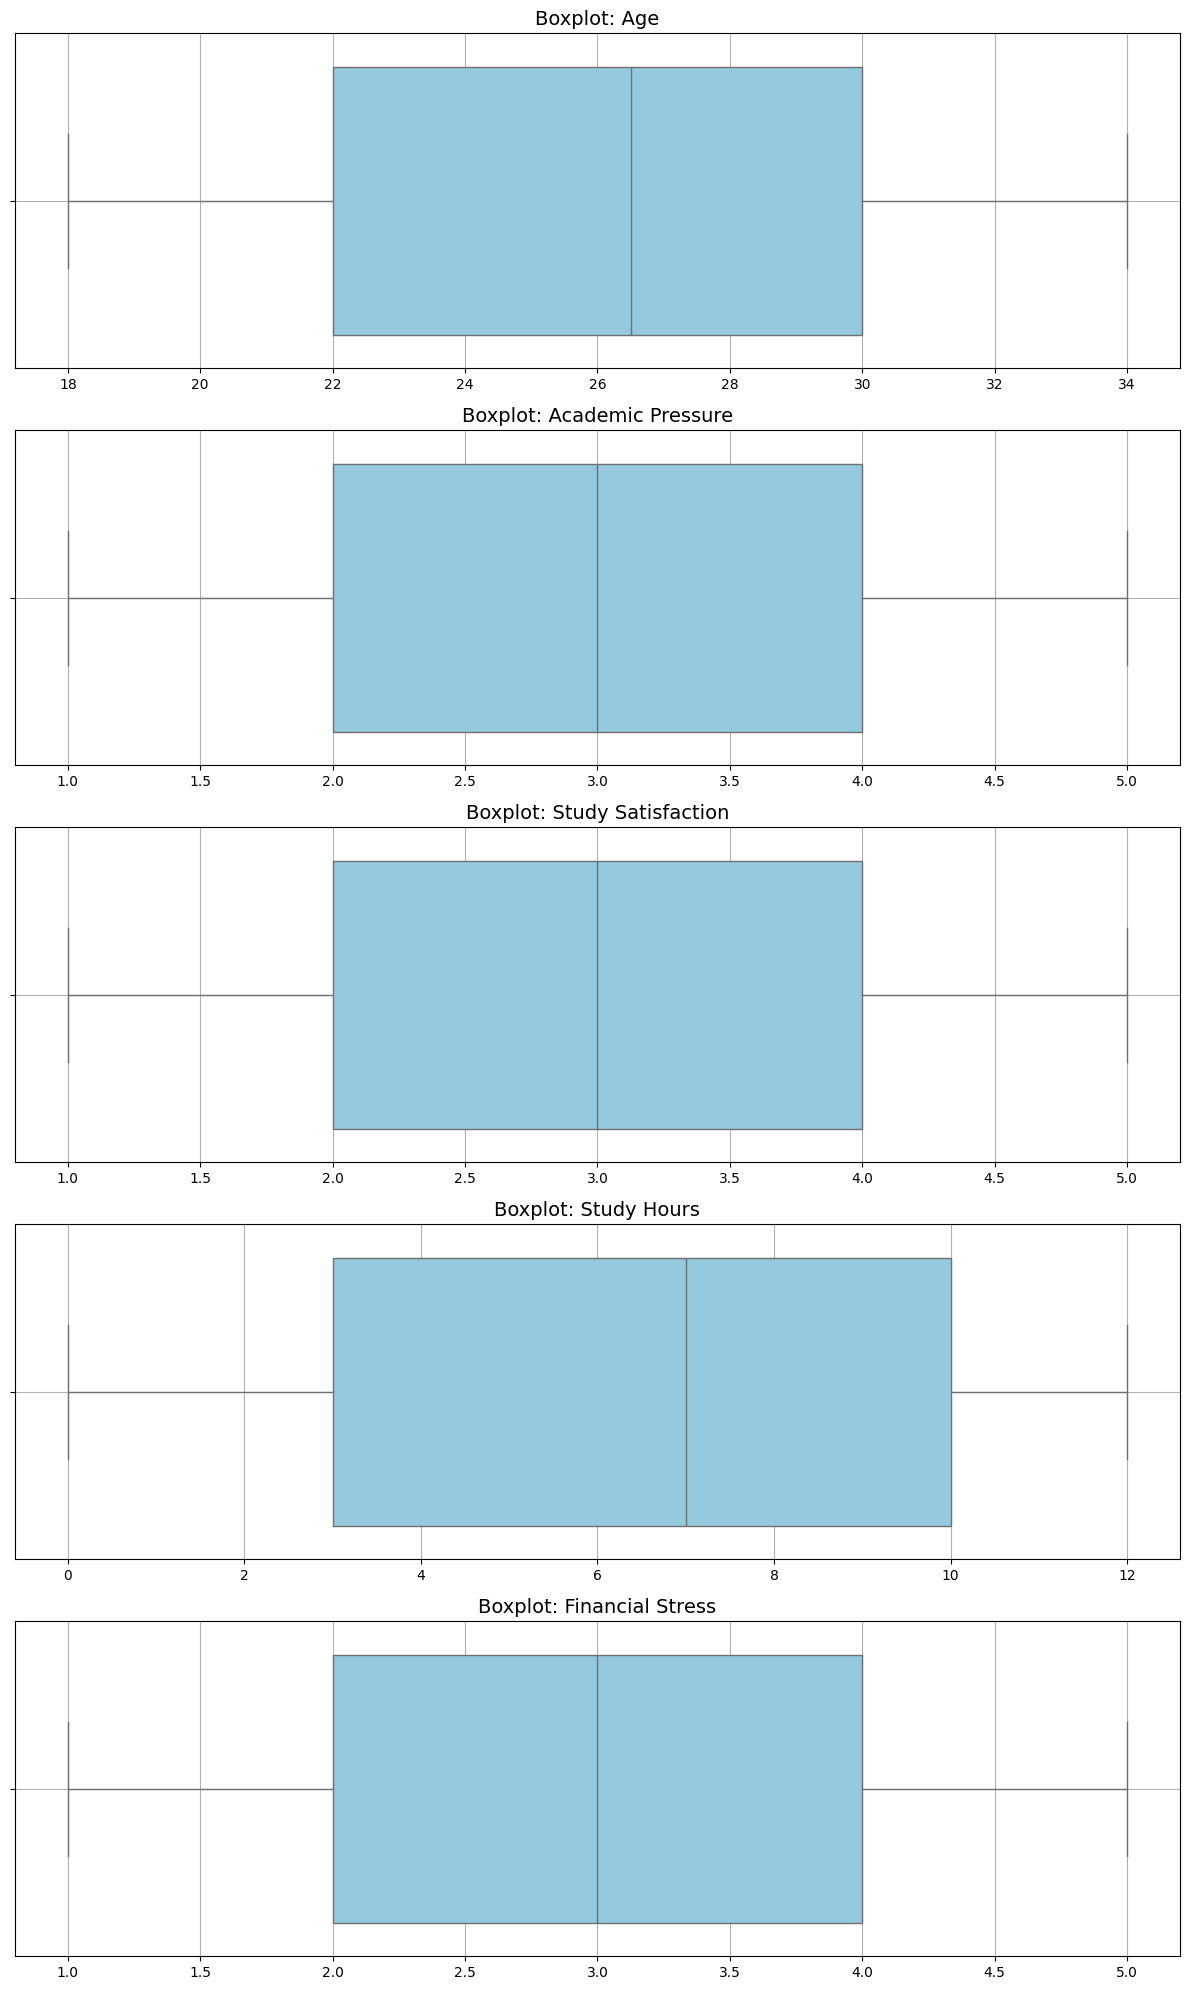

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# **Noise removal**

This part removes outliers using the IQR method to clean the numerical data.
After that, the boxplots show the new distributions without outlier values.

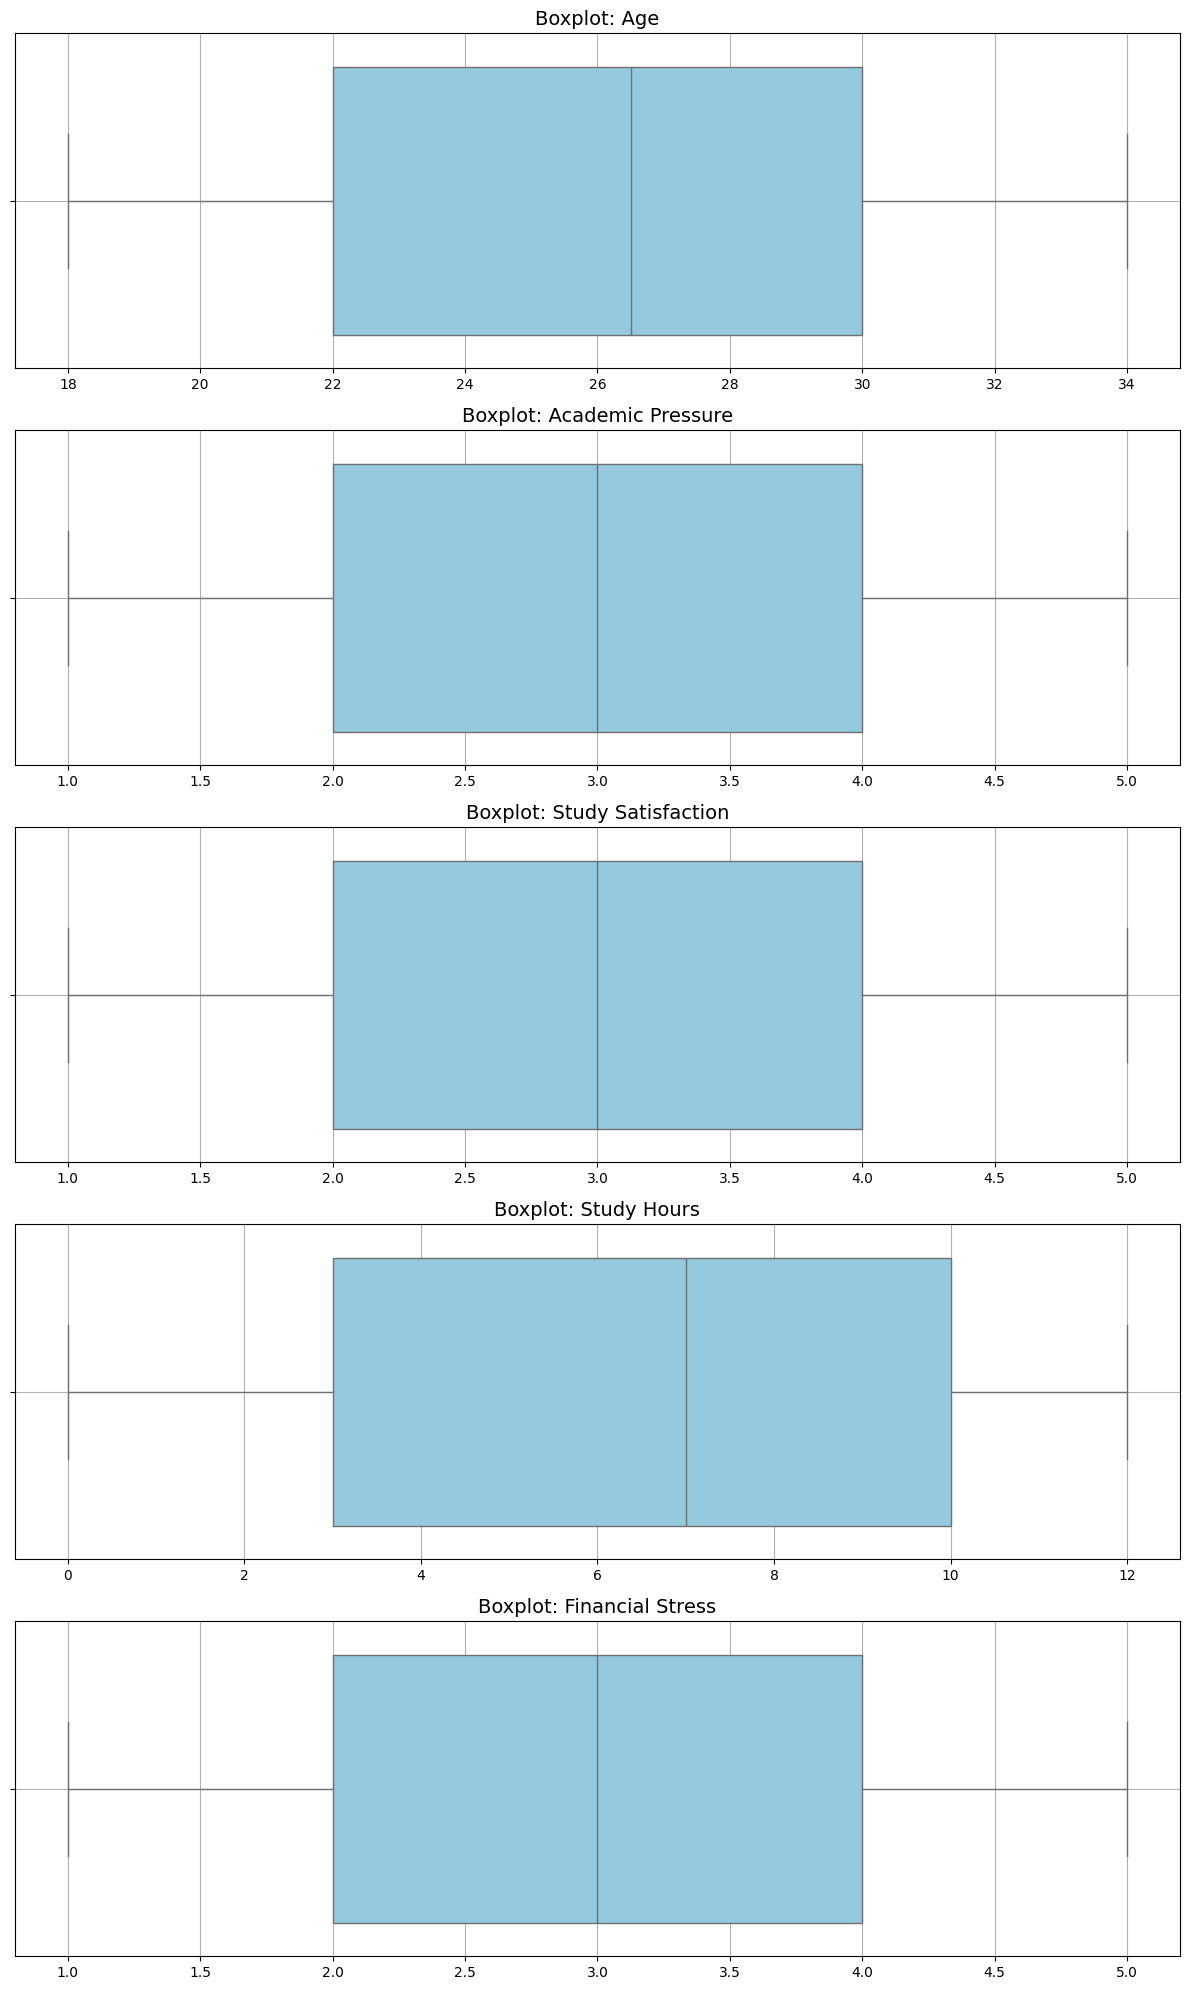

In [35]:
# *** Noise Removal
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


df = remove_outliers_iqr(df, numerical_cols)


import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


# **Age Distribution**

This bar chart shows the distribution of students across different age groups.
Most students fall within the 22–26 age range, followed by 18–21, while the 27–34 group is the least represented.
To simplify the analysis, the continuous “Age” variable was divided into categorical age groups.
This discretization helps identify patterns between age categories and other factors such as academic pressure or depression levels more effectively.

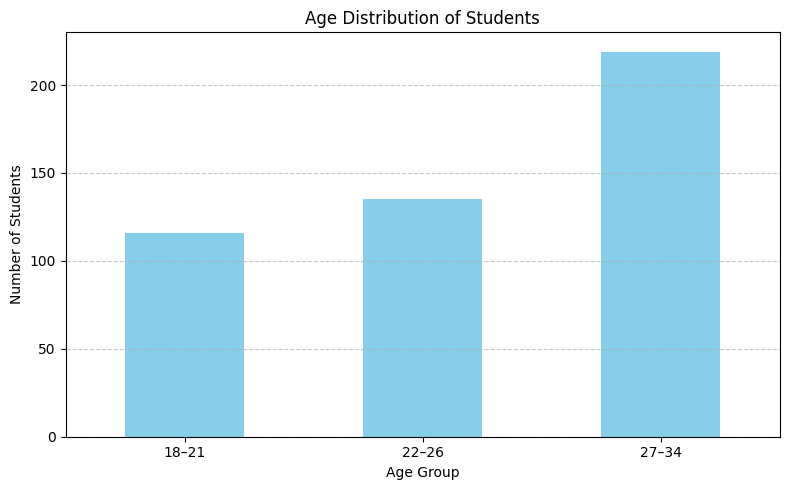

In [36]:
bins = [18, 22, 27, 34]
labels = ["18–21", "22–26", "27–34"]

age_groups = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
age_group_counts = age_groups.value_counts().sort_index()

plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title("Age Distribution of Students")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#**Label Encoding**
We applied label encoding to convert categorical values into numeric form.

#**Normalization**
We used a Min–Max scaler to rescale all numerical features to a [0, 1] range while keeping their original distribution shape.

In [37]:
# Label Encoding and Min-Max Normalization

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# Select categorical and numeric columns
categorical_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


# Step 1: Label Encoding

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Encoded categorical columns:", list(categorical_cols))


# Step 2: Min-Max Normalization

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Normalized numeric columns:", list(numeric_cols))


# Step 3: Convert integers to float (for consistency)

int_cols = df.select_dtypes(include=['int64', 'int32']).columns
df[int_cols] = df[int_cols].astype('float64')


# Step 4: Save Preprocessed Data

df.to_csv("Preprocessed_DataSet.csv", index=False)
print("Preprocessed dataset saved successfully!")


Encoded categorical columns: ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
Normalized numeric columns: ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
Preprocessed dataset saved successfully!


# **Data after preprocessing**

This part shows the dataset after preprocessing to confirm that it’s clean and ready for analysis

In [38]:
Depression_DataFrame = pd.read_csv('Preprocessed_DataSet.csv')
display(Depression_DataFrame)

print("-" * 40)

Depression_DataFrame.info()
count = pd.isnull(Depression_DataFrame).sum().sum()
print(f"The Number Of Null Values Is: {count}")


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.6250,0.25,0.75,1.0,1.0,1.0,0.750000,0.25,1.0,0.0
1,1.0,0.6250,0.75,1.00,0.0,0.0,1.0,0.583333,0.00,1.0,0.0
2,1.0,0.4375,0.00,0.50,0.0,2.0,1.0,0.833333,0.75,0.0,1.0
3,1.0,0.3125,0.00,0.75,3.0,2.0,1.0,0.583333,0.25,1.0,0.0
4,0.0,0.8125,0.00,1.00,3.0,0.0,1.0,0.333333,0.25,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
497,1.0,0.5000,1.00,0.25,3.0,2.0,0.0,0.666667,0.50,0.0,1.0
498,1.0,0.3750,0.25,0.00,2.0,2.0,1.0,0.666667,1.00,0.0,1.0
499,0.0,0.3125,0.50,1.00,0.0,0.0,0.0,0.083333,1.00,1.0,0.0
500,1.0,0.9375,0.75,0.75,3.0,0.0,0.0,0.666667,0.00,1.0,0.0


----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    float64
 1   Age                                    502 non-null    float64
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    float64
 5   Dietary Habits                         502 non-null    float64
 6   Have you ever had suicidal thoughts ?  502 non-null    float64
 7   Study Hours                            502 non-null    float64
 8   Financial Stress                       502 non-null    float64
 9   Family History of Mental Illness       502 non-null    float64
 10  Depression                       